In [2]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, select

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/2j/qtkc2d3d6ld7y6mhr39mt2_w0000gn/T/ipykernel_4412/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print(recent_date)

2017-08-23


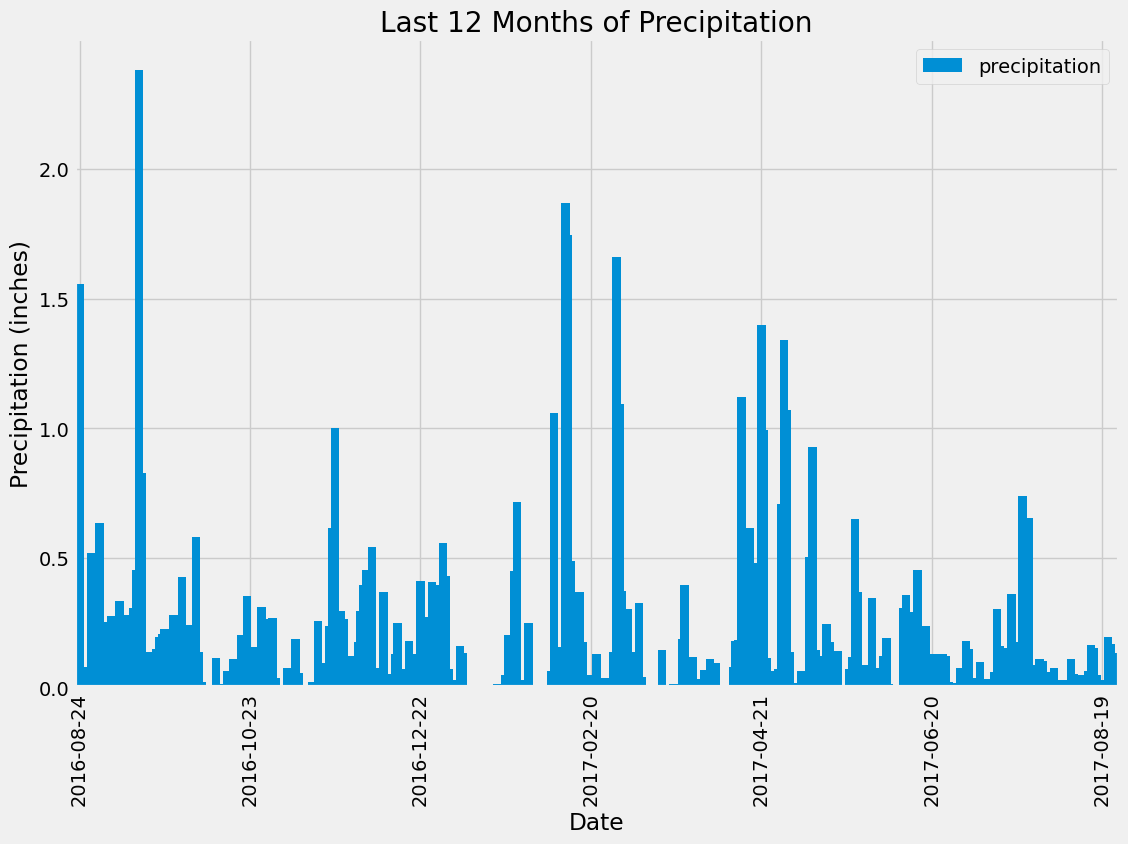

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the dataset
last_year_date = datetime.strptime(recent_date, '%Y-%m-%d') - timedelta(days=365)

# Query to retrieve the data and precipitation scores for the last 12 months
last_year_prcp = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                    filter(Measurement.date >= last_year_date).\
                    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(last_year_prcp, columns=["date", "precipitation"]).set_index("date")

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(12,8))
prcp_df.plot(kind="bar", width=3, ax=ax)
plt.title("Last 12 Months of Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=90)


# Set the x labels to be every 2 months
x_ticks = ax.get_xticks()
new_x_ticks = x_ticks[::60] # set tick every 2 months (60 days)
ax.set_xticks(new_x_ticks)

plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
stationCount = session.query(Station).count()
print(stationCount)

9


In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activeStations = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station)\
    .desc()).all()
mostActive = activeStations[0]
print(mostActive)

('USC00519281', 2772)


In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min, avg, max = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
    .where(Measurement.station == mostActive[0]).first()
    
print(min, avg, max)

54.0 71.66378066378067 85.0


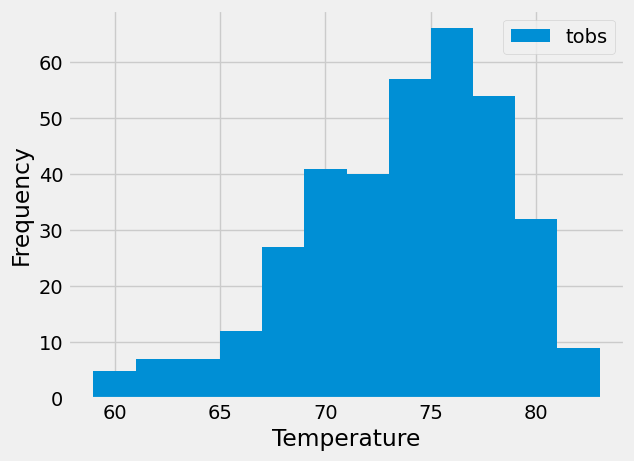

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs)\
    .filter(Measurement.station == mostActive[0], Measurement.date.between('2016-08-18', '2017-08-18'))\
    .order_by(Measurement.date.desc())\
    .all()

df = pd.DataFrame(results, columns=['tobs'])

plt.hist(df['tobs'], bins=12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.legend(['tobs'])

plt.show()


# Close session

In [86]:
# Close Session
session.close()